<a href="https://colab.research.google.com/github/Ramaseshanr/anlp/blob/master/TrigramLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('gutenberg')
nltk.download('punkt_tab')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
from nltk import trigrams
import nltk
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg
from collections import Counter

import collections
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
# corpusdir = '/your/2019/Corpus/'  # Directory of corpus.
# your_corpus = PlaintextCorpusReader(corpusdir, '.*')

def build_trigram_model():
    model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
    for sentence in gutenberg.sents("austen-emma.txt"):

    # for sentence in your_corpus.sents():
        sentence = [word.lower() for word in sentence if word.isalpha()]  # get alpha only

        for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
            model[(w1, w2)][w3] += 1

        for w1_w2 in model:
            trigram_count_4_w1w2 = float(sum(model[w1_w2].values()))
            for w3 in model[w1_w2]:
                model[w1_w2][w3] /= trigram_count_4_w1w2

    return model


In [21]:
    model = build_trigram_model()

In [22]:
def predict_next_word(w1,w2):
    next_word = model[(w1,w2)]
    predicted_words = Counter(next_word).most_common(10)
    top10Predicted_words = list(zip(*predicted_words))[0]
    probability_score = list(zip(*predicted_words))[1]
    x_pos = np.arange(len(top10Predicted_words))

    # calculate slope and intercept for the linear trend line
    # slope, intercept = np.polyfit(x_pos, probability_score, 1)

    plt.figure(figsize=(20,10))
    plt.bar(x_pos, probability_score,align='center')
    plt.xticks(x_pos, top10Predicted_words)
    plt.title(f'Predicted words for  "{w1}  {w2}"')
    plt.ylabel('Probability Score')
    plt.xlabel('Predicted Words')
    plt.show()


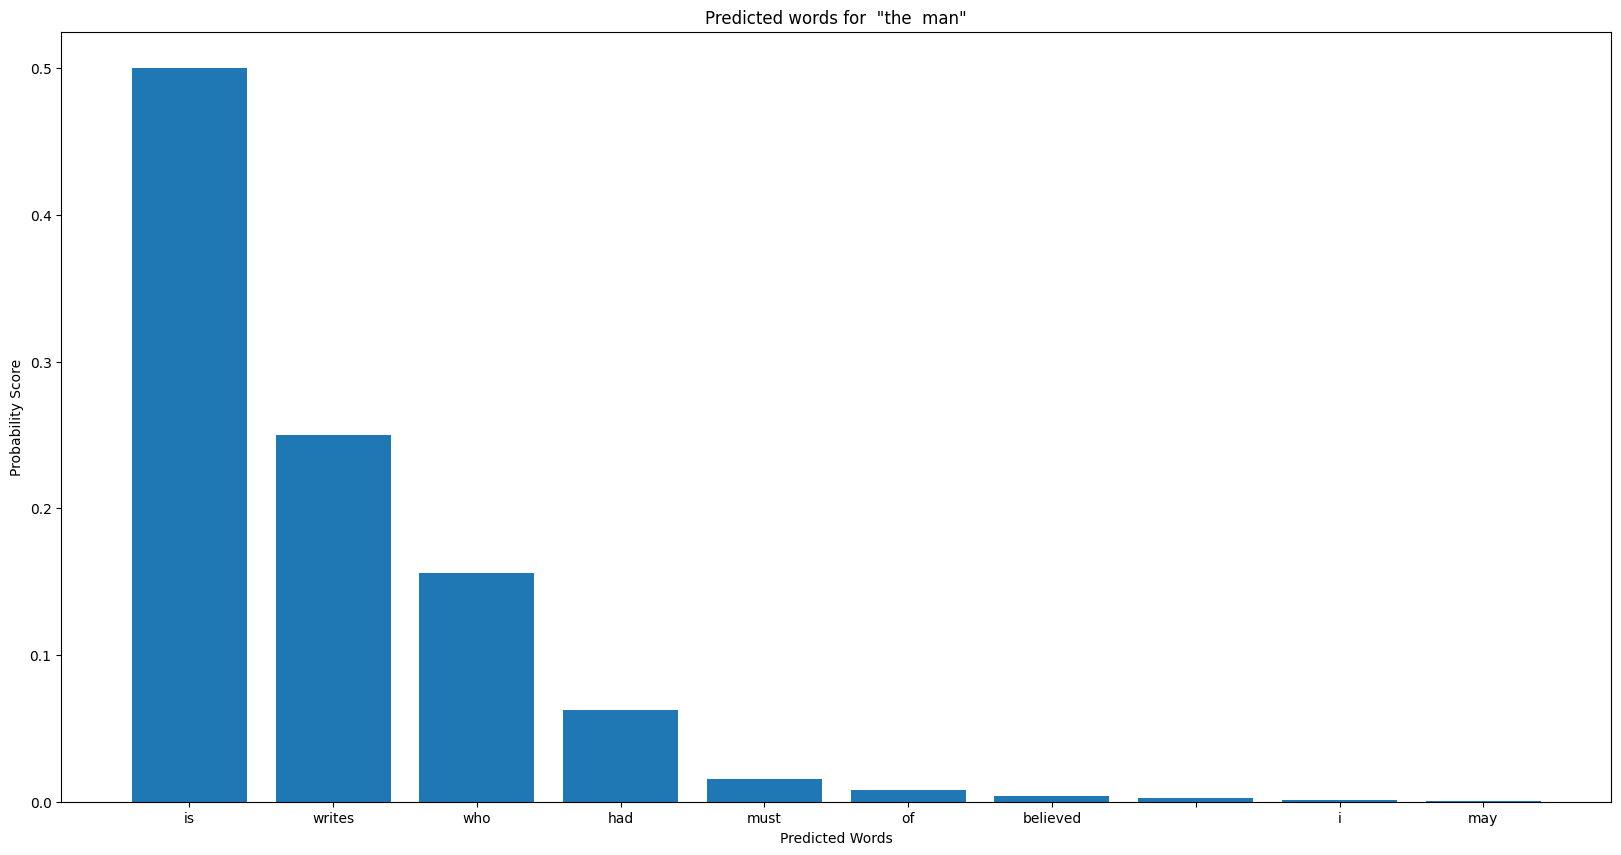

In [23]:
predict_next_word('the','man')